# 6 Diverse pyradi utilities

This notebook forms part of a series on [computational optical radiometry](https://github.com/NelisW/ComputationalRadiometry#computational-optical-radiometry-with-pyradi).  The notebooks can be downloaded from [Github](https://github.com/NelisW/ComputationalRadiometry#computational-optical-radiometry-with-pyradi). These notebooks are constantly revised and updated, please revisit from time to time.  


[<img src="https://zenodo.org/badge/doi/10.5281/zenodo.9910.png"   align="left"/>](http://dx.doi.org/10.5281/zenodo.9910)


The date of this document and module versions used in this document are given at the end of the file.  
Feedback is appreciated: neliswillers at gmail dot com.

## Overview

The pyradi library has a reasonably complete collection of Planck radiator models, both spectral and wide band. A comprehensive collection of physical constants, pertinent to optical radiation is also included.  This notebook introduces these functions in the [`pyradi.ryplanck`](http://nelisw.github.io/pyradi-docs/_build/html/ryplanck.html#pyradi.ryplanck) library.

In [1]:
from IPython.display import display
from IPython.display import Image
from IPython.display import HTML

## File and directory services

### List files in a directory

The [`ryfiles.listFiles`](http://nelisw.github.io/pyradi-docs/_build/html/ryfiles.html#pyradi.ryfiles.listFiles) function 
returns a list of file paths to files in a file system, searching a directory structure along the specified path, looking for files that matches the glob pattern. If specified, the search will continue into sub-directories.  A list of matching names is returned.
The function supports a local or network reachable filesystem, but not URLs.

The function signature is:  

`listFiles(root, patterns='*', recurse=1, return_folders=0, useRegex=False)`

- `root (string)` directory root from where the search must take place.
- `patterns (string)` glob/regex pattern for filename matching.
- `recurse (unt)`  flag to indicate if subdirectories must also be searched (optional).
- `return_folders (int)`  flag to indicate if folder names must also be returned (optional).
- `useRegex (bool)`  flag to indicate if patterns areregular expression strings (optional).

In [2]:
import pyradi.ryfiles as ryfiles
print(ryfiles.listFiles('.', '05*.ipynb'))

['05a-PlottingWithPyradi-GeneralAndCartesian.ipynb', '05b-PlottingWithPyradi-Polar-and-3D.ipynb', '.ipynb_checkpoints\\05a-PlottingWithPyradi-GeneralAndCartesian-checkpoint.ipynb', '.ipynb_checkpoints\\05b-PlottingWithPyradi-Polar-and-3D-checkpoint.ipynb']


In [3]:
import pyradi.ryfiles as ryfiles
print(ryfiles.listFiles('.', '05*', return_folders=1))

['05', '05a-PlottingWithPyradi-GeneralAndCartesian.aux', '05a-PlottingWithPyradi-GeneralAndCartesian.bbl', '05a-PlottingWithPyradi-GeneralAndCartesian.bib', '05a-PlottingWithPyradi-GeneralAndCartesian.blg', '05a-PlottingWithPyradi-GeneralAndCartesian.ipynb', '05a-PlottingWithPyradi-GeneralAndCartesian.log', '05a-PlottingWithPyradi-GeneralAndCartesian.pdf', '05a-PlottingWithPyradi-GeneralAndCartesian.tex', '05b-PlottingWithPyradi-Polar-and-3D.aux', '05b-PlottingWithPyradi-Polar-and-3D.bib', '05b-PlottingWithPyradi-Polar-and-3D.ipynb', '05b-PlottingWithPyradi-Polar-and-3D.log', '05b-PlottingWithPyradi-Polar-and-3D.pdf', '05b-PlottingWithPyradi-Polar-and-3D.tex', '.git\\objects\\05', '.git\\objects\\0e\\0502df9ef4d6591fb585e14aa10c8c0ea1e021', '.ipynb_checkpoints\\05a-PlottingWithPyradi-GeneralAndCartesian-checkpoint.ipynb', '.ipynb_checkpoints\\05b-PlottingWithPyradi-Polar-and-3D-checkpoint.ipynb', '05\\05-testfile.txt', 'pic\\05a-PlottingWithPyradi-GeneralAndCartesian_11_2.png', 'pic\\0

In [4]:
print(ryfiles.listFiles('.', '05*.ipynb', useRegex=1))

[]


In [5]:
print(ryfiles.listFiles('.', '05[ab].*', useRegex=1))

['05a-PlottingWithPyradi-GeneralAndCartesian.aux', '05a-PlottingWithPyradi-GeneralAndCartesian.bbl', '05a-PlottingWithPyradi-GeneralAndCartesian.bib', '05a-PlottingWithPyradi-GeneralAndCartesian.blg', '05a-PlottingWithPyradi-GeneralAndCartesian.ipynb', '05a-PlottingWithPyradi-GeneralAndCartesian.log', '05a-PlottingWithPyradi-GeneralAndCartesian.pdf', '05a-PlottingWithPyradi-GeneralAndCartesian.tex', '05b-PlottingWithPyradi-Polar-and-3D.aux', '05b-PlottingWithPyradi-Polar-and-3D.bib', '05b-PlottingWithPyradi-Polar-and-3D.ipynb', '05b-PlottingWithPyradi-Polar-and-3D.log', '05b-PlottingWithPyradi-Polar-and-3D.pdf', '05b-PlottingWithPyradi-Polar-and-3D.tex', 'tape7-05b', '.git\\objects\\05\\31a2ebbd47ecc38fa05a36256f1280bd3ee7b1', '.git\\objects\\2a\\e49d1400521f78ee4f6daf4d077b168f64205a', '.git\\objects\\35\\e05b54e9261b2904ef8bdd02299fc0c19512cd', '.git\\objects\\92\\4ea66db700717c196ba527005b2d1af30b3ea7', '.git\\objects\\c3\\8116e1394481e05b0c6a7306d83eb56c65a832', '.git\\objects\\cb\

In [6]:
print(ryfiles.listFiles('.', '^05[ab].*\.[^h].*', useRegex=1))

['05a-PlottingWithPyradi-GeneralAndCartesian.aux', '05a-PlottingWithPyradi-GeneralAndCartesian.bbl', '05a-PlottingWithPyradi-GeneralAndCartesian.bib', '05a-PlottingWithPyradi-GeneralAndCartesian.blg', '05a-PlottingWithPyradi-GeneralAndCartesian.ipynb', '05a-PlottingWithPyradi-GeneralAndCartesian.log', '05a-PlottingWithPyradi-GeneralAndCartesian.pdf', '05a-PlottingWithPyradi-GeneralAndCartesian.tex', '05b-PlottingWithPyradi-Polar-and-3D.aux', '05b-PlottingWithPyradi-Polar-and-3D.bib', '05b-PlottingWithPyradi-Polar-and-3D.ipynb', '05b-PlottingWithPyradi-Polar-and-3D.log', '05b-PlottingWithPyradi-Polar-and-3D.pdf', '05b-PlottingWithPyradi-Polar-and-3D.tex', '.ipynb_checkpoints\\05a-PlottingWithPyradi-GeneralAndCartesian-checkpoint.ipynb', '.ipynb_checkpoints\\05b-PlottingWithPyradi-Polar-and-3D-checkpoint.ipynb', 'pic\\05a-PlottingWithPyradi-GeneralAndCartesian_11_2.png', 'pic\\05a-PlottingWithPyradi-GeneralAndCartesian_18_0.png', 'pic\\05a-PlottingWithPyradi-GeneralAndCartesian_18_1.png'

### Working with filenames and directories

The information in this section does not describe any pyradi functionality, but may be useful in this context.

To split a qualified path into the folder and filename use [`os.path.split`](https://docs.python.org/2/library/os.path.html), yielding a tuple with the path as the first element and the filename as the second element.

In [7]:
import os.path
print(type(os.path.split('05\\05-testfile.txt')))
print(os.path.split('05\\05-testfile.txt'))
print(os.path.basename('05\\05-testfile.txt'))
print(os.path.dirname('05\\05-testfile.txt'))

<type 'tuple'>
('05', '05-testfile.txt')
05-testfile.txt
05


To join a folder and a filename use  [`os.path.join`](https://docs.python.org/2/library/os.path.html), but there is a catch here;  `os.path.join` does not expect the tuple, but simply a number of arguments.  Study the documentation carefully, because [`os.path.join`](https://docs.python.org/2/library/os.path.html) may discard some arguments.

Alternatively, use `os.sep` or `os.path.sep` to get the pathname separator ('/' for POSIX and '\\' for Windows) and then use this character to join the list.

In [8]:
print(os.path.join(* os.path.split('05\\05-testfile.txt')))
print(os.sep.join(os.path.split('05\\05-testfile.txt')))
print(os.path.sep.join(os.path.split('05\\05-testfile.txt')))

05\05-testfile.txt
05\05-testfile.txt
05\05-testfile.txt


To test for the existance of a file use `os.path.lexists` or `os.path.exists`, see the documentation to confirm the difference between the two.

In [9]:
print(os.path.lexists('05\\05-testfile.txt'))
print(os.path.lexists('06\\05-testfile.txt'))

True
False


### Downloading compressed and uncompressed files from the internet

The [`ryfiles.downloadFileUrl`](http://nelisw.github.io/pyradi-docs/_build/html/ryfiles.html#pyradi.ryfiles.downloadFileUrl) function downloads a file from a URL.  The URL is used to download a file, to the saveFilename specified. If no saveFilename is given, the basename of the URL is used.  The name of the downloaded file is returned, or None if the download file.

The function signature is:  

    `downloadFileUrl(url,  saveFilename=None)`

- `url (string)` the url to be accessed.
- `saveFilename (string)` path to where the file must be saved (optional).

The [`ryfiles.downloadUntar`](http://nelisw.github.io/pyradi-docs/_build/html/ryfiles.html#pyradi.ryfiles.downloadUntar) downloads and untars a compressed tar archive, and saves all files to the specified directory.    The tarfilename is used to open the tar file, extracting to the destinationDir specified. If no destinationDir is given, the local directory '.' is used.  Returns a list of the intarred filenames, or None of not succesful. Before downloading, a check is done to determine if the file was already downloaded  and exists in the local file system.

The file signature is:  

    `downloadUntar(tgzFilename, url, destinationDir=None,  tarFilename=None)`

- `tgzFilename (string)` the name of the tar archive file.
- `url (string)` url where to look for the file (not including the filename).
- `destinationDir (string)` to where the files must be extracted  (optional).
- `tarFilename (string)` downloaded tar filename (optional).

The [`ryfiles.untarTarfile`](http://nelisw.github.io/pyradi-docs/_build/html/ryfiles.html#pyradi.ryfiles.untarTarfile) untars a tar archive, and save all files to the specified directory. The tarfilename is used to open a file, extraxting to the saveDirname specified. If no saveDirname is given, the local directory '.' is used. Returns a list of filenames saved, or None if failed.

The file signature is:  

    `untarTarfile(tarfilename, saveDirname=None)`

- `tarfilename (string)` the name of the tar archive.
- `saveDirname (string)` to where the files must be extracted


The [`ryfiles.unzipGZipfile`](http://nelisw.github.io/pyradi-docs/_build/html/ryfiles.html#pyradi.ryfiles.unzipGZipfile)
unzips a file that was compressed using the gzip format.  The zipfilename is used to open a file, to the saveFilename specified. If no saveFilename is given, the basename of the zipfilename is used, but with the file extension removed.  Returns the filename of the saved file, or None if failed.

The file signature is:  
    
    `unzipGZipfile(zipfilename, saveFilename=None)`

- `zipfilename (string)` the zipfilename to be decompressed.
- `saveFilename (string)` to where the file must be saved (optional).

The following example downloads a file, uncompress and untar the file, saving all the files in the tar archive to the destination directory (the current working directory in this case).

In [10]:
tgzFilename = 'arrayplotdemo.tgz'
destinationDir = '.'
tarFilename = 'arrayplotdemo.tar'
url = 'https://raw.githubusercontent.com/NelisW/pyradi/master/pyradi/data/'
dlNames = ryfiles.downloadUntar(tgzFilename, url, destinationDir, tarFilename)

if dlNames:
    print('filesAvailable are {}'.format(dlNames))

filesAvailable are ['arrayplotdemo.txt']


## Pulse detection: probability of detection and false alarm rate

The [`ryutils.detectSignalToNoise`](http://nelisw.github.io/pyradi-docs/_build/html/ryutils.html#pyradi.ryutils.detectSignalToNoise)
function solves for the  signal to noise ratio, given the threshold to noise ratio and probability of detection.  Using the theory of matched filter design, calculate the  signal to noise ratio, to achieve a required probability of detection. The function returns the  signal to noise ratio required to achieve the probability of detection.
Reference: "Electro-optics handbook," Tech. Rep. EOH-11, RCA, 1974. RCA Technical Series Publication.  

When there is a signal present, the probability of detection (signal plus noise exceeds the threshold) is given by

$$
P_d =
\frac{1}{2}\left[
1+{\rm erf}\left(
\frac{i_s-i_t}{\sqrt{2}i_n}
\right)
\right]
$$

where ${\rm erf}$ is the error function:

$$
{\rm erf}(z)=\frac{2}{\sqrt{\pi}}\int_0^z e^{-t^2}dt.
$$



The function signature is:

    `detectSignalToNoise(ThresholdToNoise, pD)`  

- `ThresholdToNoise (float)` the threshold to noise ratio (unitless).
- `pD (float)` the probability of detection (unitless).

The [`ryutils.detectThresholdToNoise`](http://nelisw.github.io/pyradi-docs/_build/html/ryutils.html#pyradi.ryutils.detectThresholdToNoise)
function solve for threshold to noise ratio, given pulse width and FAR, for matched filter.  Using the theory of matched filter design, calculate the     threshold to noise ratio, to achieve a required false alarm rate. The function returns the threshold to noise ratio.  Reference   R. D. Hippenstiel, Detection Theory: Applications and Digital Signal Pro-cessing, CRC Press, 2002.

The average false alarm rate is given by
$$
{FAR}=
\frac{1}{2 t_p \sqrt{3}}\exp^{-i_t^2/(2i_n^2)},
$$
where
$t_p$ is the pulse width,
$i_t$ is the threshold value, and
$i_n$ is the rms noise value at the input to the threshold detector.


The function signature is:
    `detectThresholdToNoise(pulseWidth, FAR)`
    
- `pulseWidth (float)` the signal pulse width in [s].
- `FAR (float)` the false alarm rate in [alarms/s].



In [11]:
import pyradi.ryutils as ryutils

pulsewidth = 100e-9
FAR = 15
probDetection = 0.999
ThresholdToNoise = ryutils.detectThresholdToNoise(pulsewidth,FAR)
SignalToNoise = ryutils.detectSignalToNoise(ThresholdToNoise, probDetection)
print('For a laser pulse with width={0}, a FAR={1} and Pd={2},'.format(pulsewidth,FAR,probDetection))
print('the Threshold to Noise ratio must be {0}'.format(ThresholdToNoise))
print('and the Signal to Noise ratio must be {0}'.format(SignalToNoise))
print(' ')

For a laser pulse with width=1e-07, a FAR=15 and Pd=0.999,
the Threshold to Noise ratio must be 4.93307046878
and the Signal to Noise ratio must be 8.02330277495
 


## Solving the range equation

It is frequently necessary to determine the operational detection distance of a source and sensor combination. The problem is usually stated as follows: "What operating detection range can be achieved with a given source intensity, atmospheric attenuation, and sensor sensitivity?"  
The inband irradiance is given by (Sec. 7.5)

$$
E_{\cal S}=\frac{v_{\cal S} }{k \,\widehat{{\cal R}}\,Z_t\,A_{1}}
=
\int_{A_0} \left(
\frac{1}{R_{01}^2}
\int_{0}^{\infty}
 \epsilon_{0\lambda} L_{0\lambda}
\,\tau_{a\lambda}(R) {\cal S}_\lambda\,
d\lambda\right) dA_{0}\,\cos\theta_0
$$

The objective is to solve for $R$ where the irradiance $E_{{\cal S}}=E_{{\cal S}\theta}$ is at the threshold at which the range must be determined.  Normally, $E_{{\cal S}\theta}=SNR\times NEE$ where the SNR is selected to yield a given probability of detection. 

Assuming a target smaller than the sensor field of view, and using the effective transmittance the above equation can be simplified to the form

$$
E_{{\cal S}\theta}=\frac{I_{{\cal S}} \tau_{\rm eff}(R)}{R^2}
$$

where $I_{{\cal S}}$ is the source intensity. 
This equation can be solved is $\tau_{\rm eff}(R)$ is available in lookup table form.

The [`ryutils.rangeEquation`](http://nelisw.github.io/pyradi-docs/_build/html/ryutils.html#pyradi.ryutils.rangeEquation) function solves the range equation for arbitrary transmittance vs range, with the equation given by

$$
E=\frac{I_{{\cal S}} \tau_{\rm eff}(R)}{R^n}
$$

where $E$ is the threshold irradiance in [W/m2], and $I$ is the intensity in [W/sr]. This range equation holds for
the case where the target is smaller than the field of view.

The range $R$ must be in [m], and $\tau_a(R)$
is calculated from a lookup table of atmospheric transmittance vs. range.
The transmittance lookup table  can be calculated from the simple Bouguer law,
or it can have any abritrary shape, provided it decreases with increasing range.
The user supplies the lookup table in the form of an array of range values and
an associated array of transmittance values.  The range values need not be on
constant linear range increment.

The parameter $n$

* $n$=2 (default value) the general case of a radiating source   smaller than the field of view.

* $n$=4 the special case of a laser rangefinder illuminating a splot smaller than the sensor field of view, viewed against the sky. In this case there  is an $R^2$ attenuation from the laser to the source and another $R^2$ attenuation from the source to the receiver, hence   $R^4$ overall.

The function signature is:  
    `rangeEquation(Intensity, Irradiance, rangeTab, tauTab, rangeGuess = 1, n = 2)`
    
- `Intensity (float or np.array[N,] or [N,1])`  in  [W/sr].
- `Irradiance (float or np.array[N,] or [N,1])`  in  [W/m2].
- `rangeTab (np.array[N,] or [N,1])`  range vector for tauTab lookup in [m].
- `tauTab (np.array[N,] or [N,1])`   transmittance vector for lookup range in [m].
- `rangeGuess (float)` starting value range estimate in [m] (optional).
- `n (float)` range power (2 or 4) (optional).

If the range solution is doubtful (e.g. not a trustworthy solution) the returned value is made negative.  The following example  attempts to solve the equation for three cases, only one of which provides a stable solution.

In [12]:
import  numpy as np
from scipy.interpolate import interp1d

rangeTab = np.linspace(0, 10000, 1000)
tauTab = np.exp(- 0.00015 * rangeTab)
Intensity=200
Irradiancetab=[10e-100, 10e-6, 10e-1]
for Irradiance in Irradiancetab:
    r = ryutils.rangeEquation(Intensity = Intensity, Irradiance = Irradiance, rangeTab = rangeTab,
          tauTab = tauTab, rangeGuess = 1, n = 2)

    #test the solution by calculating the irradiance at this range.
    tauTable = interp1d(rangeTab, tauTab, kind = 'linear')

    if np.abs(r[0]) < rangeTab[2]:
        rr = rangeTab[2]
        strError = "Check range resolution in lookup table"
    elif np.abs(r[0]) > rangeTab[-1]:
        rr = rangeTab[-1]
        strError = "Check maximum range in lookup table"
    else:
        rr = r[0]
        strError = ""

    irrad = Intensity * tauTable(rr) / rr ** 2

    print('Range equation solver with irradiance threshold of {} W/m2:'.format(Irradiance))
    print('   intensity of {4} W/sr at range {0} m the irradiance is {1} W/m2, error is {2:.2e}. \n{3}\n'.format(
        r[0],irrad, (irrad - Irradiance) / Irradiance, strError, Intensity))

Range equation solver with irradiance threshold of 1e-99 W/m2:
   intensity of 200 W/sr at range -11381.1289096 m the irradiance is 4.46260320297e-07 W/m2, error is 4.46e+92. 
Check maximum range in lookup table

Range equation solver with irradiance threshold of 1e-05 W/m2:
   intensity of 200 W/sr at range 3452.03409009 m the irradiance is 1e-05 W/m2, error is 1.19e-14. 


Range equation solver with irradiance threshold of 1.0 W/m2:
   intensity of 200 W/sr at range -14.1271613694 m the irradiance is 0.497504247749 W/m2, error is -5.02e-01. 
Check range resolution in lookup table



The next example plots the detection range for a missile given the threshold irradiance, viewing an aircraft with signature of 200W/sr, through an atmosphere with an attenuation coefficient of 0.15 km-1.   The graphs shows that when viewing the target through the atmosphere, an irradiance threshold (sensitivity) of 1 $\mu$W/m$^2$ will provide a detection distance of 8 km. A missile with sensitivity of 0.1 $\mu$W/m$^2$ provides a detection distance of 15 km.  The example shows that you need ten times better sensitivity to double the detection distance.  Increased detection distance comes at a tremendous cost!

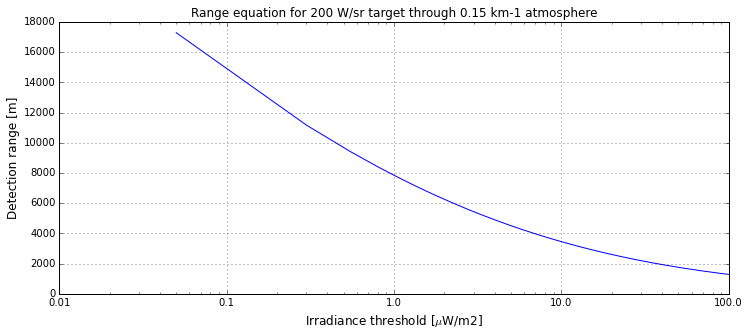

In [13]:
import pyradi.ryutils as ryutils
import pyradi.ryplot as ryplot
import  numpy as np
from scipy.interpolate import interp1d
%matplotlib inline

rangeTab = np.linspace(0, 100000, 1000)
atmogamma = 0.00015
tauTab = np.exp(- atmogamma * rangeTab)
Intensity=200
Irradiancetab=np.linspace(0.05e-6, 100e-6, 400)
r = np.zeros((Irradiancetab.shape))
for i,Irradiance in enumerate(Irradiancetab):
    r[i] = ryutils.rangeEquation(Intensity = Intensity, Irradiance = Irradiance, rangeTab = rangeTab,
          tauTab = tauTab, rangeGuess = 1, n = 2)

p=ryplot.Plotter(1, 2, 1, figsize=(12,12))
p.semilogX(1,Irradiancetab*1e6,r,'Range equation for 200 W/sr target through {} km-1 atmosphere'.format(atmogamma*1000.),
      'Irradiance threshold [$\mu$W/m2]','Detection range [m]');
    

## Absolute humidity

The [`ryutils.abshumidity`](http://nelisw.github.io/pyradi-docs/_build/html/ryutils.html#pyradi.ryutils.abshumidity) function  calculates atmopsheric absolute humidity [g/m3] for temperature in [K] between 248 K and 342 K. This function provides two similar equations, but with different constants.

Atmospheric humidity is commonly expressed in relative humidity (RH). Relative humidity is the quantity of water vapor in the atmosphere, expressed as a percentage of the maximum absolute humidity.  The maximum absolute humidity is determined by the water-vapor partial pressure at the atmospheric temperature and is given by [this equation](http://www.vaisala.com/Vaisala%20Documents/Application%20notes/Humidity_Conversion_Formulas_B210973EN-D.pdf) (Equation 1 in the function):
$$
q=\frac{1325.252}{T} 10^{7.5892(T - 273.15)/(T -32.44)},
$$
in units of [g/m$^3$] and temperature in [K]. This equation has an error of less than 1% over the range $-$20 $^\circ$C to 0 $^\circ$C, and less than 0.1% for the temperature range 0 $^\circ$C to 50 $^\circ$C. 

The [alternative equation](#http://www.see.ed.ac.uk/~shs/Climate%20change/Data%20sources/Humidity%20with%20altidude.pdf)  (Equation 1 in the function) is: 
$$
q=\frac{1324.37872}{T} \exp[
17.67*(T - 273.16)/(T - 29.66))
$$

The function signature is:
    `abshumidity(T, equationSelect = 1)`  
    
- `temperature (np.array[N,] or [N,1])`  in  [K].
- `equationSelect (int)` select the equation to be used.


In this example the values from the equations are compared to [data from](http://rolfb.ch/tools/thtable.php?tmin=-25&tmax=50&tstep=5&hmin=10&hmax=100&hstep=10&acc=2&calculate=calculate):

        deg C          Testvalue           Fn value       % Error
[[  5.00000000e+01   8.27800000e+01   8.28288052e+01  -5.89229459e-02]
 [  4.50000000e+01   6.52500000e+01   6.53105744e+01  -9.27481918e-02]
 [  4.00000000e+01   5.09800000e+01   5.10475988e+01  -1.32422991e-01]
 [  3.50000000e+01   3.94700000e+01   3.95318519e+01  -1.56460806e-01]
 [  3.00000000e+01   3.02600000e+01   3.03161305e+01  -1.85150640e-01]
 [  2.50000000e+01   2.29700000e+01   2.30097997e+01  -1.72968594e-01]
 [  2.00000000e+01   1.72400000e+01   1.72744162e+01  -1.99232035e-01]
 [  1.50000000e+01   1.28000000e+01   1.28192871e+01  -1.50453884e-01]
 [  1.00000000e+01   9.38000000e+00   9.39702200e+00  -1.81142459e-01]
 [  5.00000000e+00   6.79000000e+00   6.79913283e+00  -1.34323439e-01]
 [  0.00000000e+00   4.85000000e+00   4.85173751e+00  -3.58120391e-02]
 [ -5.00000000e+00   3.41000000e+00   3.41141647e+00  -4.15215865e-02]
 [ -1.00000000e+01   2.36000000e+00   2.36126844e+00  -5.37186742e-02]
 [ -1.50000

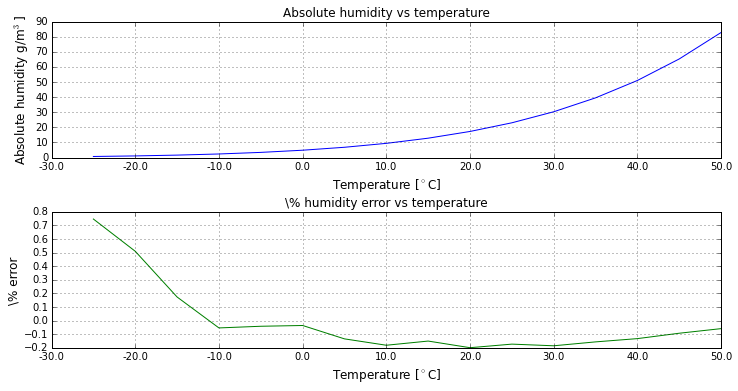

In [14]:
import pyradi.ryplot as ryplot
%matplotlib inline

data=np.asarray([
[   50  ,   82.78  ]   ,
[   45  ,   65.25    ]   ,
[   40  ,   50.98    ]   ,
[   35  ,   39.47    ]   ,
[   30  ,   30.26    ]   ,
[   25  ,   22.97  ]   ,
[   20  ,   17.24    ]   ,
[   15  ,   12.8    ]   ,
[   10  ,   9.38 ]   ,
[   5   ,   6.79 ]   ,
[   0   ,   4.85 ]   ,
[   -5  ,   3.41 ]   ,
[   -10 ,   2.36 ]   ,
[   -15 ,   1.61 ]   ,
[   -20 ,   1.08 ]   ,
[   -25 ,   0.71 ] ])
temperature = data[:,0]+273.15
absh = ryutils.abshumidity(temperature).reshape(-1,1)
data = np.hstack((data,absh))
# absh = ryutils.abshumidity(temperature, 2).reshape(-1,1)
# data = np.hstack((data,absh))
data = np.hstack((data, 100 * np.reshape((data[:,1]-data[:,2])/data[:,2],(-1,1))))
print('        deg C          Testvalue           Fn value       % Error')
print(data)

p=ryplot.Plotter(1, 2, 1, figsize=(12,6))
p.plot(1,data[:,0].T, data[:,2].T,'Absolute humidity vs temperature','Temperature [$^\circ$C]','Absolute humidity g/m$^3$]')
p.plot(2,data[:,0].T, data[:,3].T,'\% humidity error vs temperature','Temperature [$^\circ$C]','\% error')
# p.saveFig('abshum.eps')


#highest ever recorded absolute humidity was at dew point of 34C
print('Highest recorded absolute humidity was {0}, dew point {1} deg C'.\
    format(ryutils.abshumidity(np.asarray([34 + 273.15]))[0],34))

## Transformation between polar and cartesian coordinates

The 
[`ryutils.cart2polar`](http://nelisw.github.io/pyradi-docs/_build/html/ryutils.html#pyradi.ryutils.cart2polar)
and
[`ryutils.polar2cart`](http://nelisw.github.io/pyradi-docs/_build/html/ryutils.html#pyradi.ryutils.polar2cart)
provides conversion between polar and cartesian coordinates.

The [`ryutils.cart2polar`](http://nelisw.github.io/pyradi-docs/_build/html/ryutils.html#pyradi.ryutils.cart2polar)
function signature:

    `cart2polar(x, y)`

- `x (float np.array)` x values in array format.
- `y (float np.array)` y values in array format.

returns

- `r (float np.array)` radial component for given (x,y).
- `theta (float np.array)` angular component for given (x,y).


The [`ryutils.polar2cart`](http://nelisw.github.io/pyradi-docs/_build/html/ryutils.html#pyradi.ryutils.polar2cart)
function signature:

    `polar2cart(r, theta)`

- `r (float np.array)` radial values in array format.
- `theta (float np.array)` angular values in array format.

returns

- `x (float np.array)` x component for given (r, theta).
- `y (float np.array)` y component for given (r, theta).

This transformation code was written by [Joe Kington](https://stackoverflow.com/questions/3798333/image-information-along-a-polar-coordinate-system).

In [15]:
import pyradi.ryutils as ryutils
import numpy as np

r, t = ryutils.cart2polar(5, 5)
x, y = ryutils.polar2cart(r, t)
print('{} {} -> {} {}'.format(x, y, r, t))

r, t = ryutils.cart2polar(np.asarray([3, 5]), np.asarray([5, 3]))
x, y = ryutils.polar2cart(r, t)
print('{} {} -> {} {}'.format(x, y, r, t))

r, t = ryutils.cart2polar(np.asarray([[3, 5], [5, 3]]), np.asarray([[5, 3], [3, 5]]))
x, y = ryutils.polar2cart(r, t)
print('{} {} -> {} {}'.format(x, y, r, t))

5.0 5.0 -> 7.07106781187 0.785398163397
[ 3.  5.] [ 5.  3.] -> [ 5.83095189  5.83095189] [ 1.03037683  0.5404195 ]
[[ 3.  5.]
 [ 5.  3.]] [[ 5.  3.]
 [ 3.  5.]] -> [[ 5.83095189  5.83095189]
 [ 5.83095189  5.83095189]] [[ 1.03037683  0.5404195 ]
 [ 0.5404195   1.03037683]]


## Calculating coordinate index arrays for a Numpy array

The 
[`ryutils.index_coords`](http://nelisw.github.io/pyradi-docs/_build/html/ryutils.html#pyradi.ryutils.index_coords) function calculates zero-based (x,y) coordinate arrrays for a numpy array indices, relative to some origin.

This function calculates two meshgrid arrays containing the coordinates of the 
input array.  The origin of the new coordinate system  defaults to the 
center of the image, unless the user supplies a new origin. 

The data format can be data.shape = (rows, cols, frames) or 
data.shape = (frames, rows, cols), the format of which is indicated by the 
framesFirst parameter.

The function signature is:

    `index_coords(data, origin=None, framesFirst=True)`

- `data (np.array)` array for which coordinates must be calculated.
- `origin ( (x-orig, y-orig) )` data-coordinates of where origin should be
- `framesFirst (bool)` True if data.shape is (frames, rows, cols), False if data.shape is (rows, cols, frames)

returns

- `x (float np.array)` x coordinates in array format.
- `y (float np.array)` y coordinates in array format.

This transformation code was originally written by [Joe Kington](https://stackoverflow.com/questions/3798333/image-information-along-a-polar-coordinate-system).

The following example demonstrates the variations obtained for frames first or frames last, and the location of the origin.

In [16]:
import pyradi.ryutils as ryutils
import numpy as np

data = np.ones([2, 3, 4])

x, y = ryutils.index_coords(data, origin=None, framesFirst=True)
print('framesFirst=True, origin=None')
print('x={}\ny={}'.format(x,y))
    
x, y = ryutils.index_coords(data, origin=None, framesFirst=False)
print('\nframesFirst=False, origin=None')
print('x={}\ny={}'.format(x,y))
   
x, y = ryutils.index_coords(data, origin=(0,0), framesFirst=True)
print('\nframesFirst=True, origin=(0,0)')
print('x={}\ny={}'.format(x,y))

x, y = ryutils.index_coords(data, origin=(3,2), framesFirst=True)
print('\nframesFirst=True, origin=(3,2)')
print('x={}\ny={}'.format(x,y))
    

framesFirst=True, origin=None
x=[[-2 -1  0  1]
 [-2 -1  0  1]
 [-2 -1  0  1]]
y=[[-1 -1 -1 -1]
 [ 0  0  0  0]
 [ 1  1  1  1]]

framesFirst=False, origin=None
x=[[-1  0  1]
 [-1  0  1]]
y=[[-1 -1 -1]
 [ 0  0  0]]

framesFirst=True, origin=(0,0)
x=[[0 1 2 3]
 [0 1 2 3]
 [0 1 2 3]]
y=[[0 0 0 0]
 [1 1 1 1]
 [2 2 2 2]]

framesFirst=True, origin=(3,2)
x=[[-3 -2 -1  0]
 [-3 -2 -1  0]
 [-3 -2 -1  0]]
y=[[-2 -2 -2 -2]
 [-1 -1 -1 -1]
 [ 0  0  0  0]]


## Latex utilities

### LaTeX code for EPS graphic inclusion 

The [`ryfiles.epsLaTexFigure`](http://nelisw.github.io/pyradi-docs/_build/html/ryfiles.html#pyradi.ryfiles.epsLaTexFigure)
function writes the LaTeX code to include an eps graphic as a latex figure. The text is added to an existing file.

The function signature is:
    `epsLaTexFigure(filename, epsname, caption, scale, filemode='a')`

- `fname (string)` text writing output path and filename.
- `epsname (string)` filename/path to eps file (relative to where the LaTeX document is built).
- `caption (string)` figure caption.
- `scale (double)` figure scale to textwidth [0..1].
- `filemode (string)` file open mode (a=append, w=new file) (optional).

In [17]:
ryfiles.epsLaTexFigure('eps.tex', 'picture.eps', 'This is the caption', 0.75,'w')

import os.path    
if os.path.sep == '/':
    !cat eps.tex
else:
    !type eps.tex

\begin{figure}[tb]
\centering
\resizebox{0.75\textwidth}{!}{\includegraphics{eps/picture.eps}}
\caption{This is the caption. \label{fig:picture}}
\end{figure}




### Numpy arrays in LaTeX code

The [`ryfiles.arrayToLaTex`](http://nelisw.github.io/pyradi-docs/_build/html/ryfiles.html#pyradi.ryfiles.arrayToLaTex)
function writes a numpy array to latex table format in output file.
The table can contain only the array data (no top header or
left column side-header), or you can add either or both of the
top row or side column headers. Leave 'header' or 'leftcol' as
None is you don't want these.

The output format of the array data can be specified, i.e.
scientific notation or fixed decimal point.

The function signature is:
    `arrayToLaTex(filename, arr, header=None, leftCol=None,formatstring='%1.4e', filemode='wt')`
    
- `fname (string)` text writing output path and filename.
- `arr (np.array[N,M])` array with table data.
- `header (string)` column header in final latex format (optional).
- `leftCol ([string])` left column each row, in final latex format (optional).
- `formatstring (string)` output format precision for array data (see [numpy.savetxt](http://docs.scipy.org/doc/numpy/reference/generated/numpy.savetxt.html)) (optional).
- `filemode (string)` file open mode (a=append, w=new file)    (optional). 

With `\usepackage{siunitx}` you can use the siunitx `\num` formatter to format the output.

In [18]:
arr = np.asarray([[1.0,2,3],[4,5,6],[7,8,9]])
ryfiles.arrayToLaTex('array.tex', arr)
ryfiles.arrayToLaTex('array.tex', arr, formatstring='%.1f',filemode='a')
headeronly = 'Col1 & Col2 & Col3'
ryfiles.arrayToLaTex('array.tex', arr, headeronly, formatstring='%.3f',filemode='a')
header = 'Col 1 & Col 2 & Col 3'
leftcol = ['XX','Row 1','Row 2','Row 3']
ryfiles.arrayToLaTex('array.tex', arr, header, leftcol, formatstring=r'\num{%.6e}',filemode='a')

import os.path    
if os.path.sep == '/':
    !cat array.tex
else:
    !type array.tex

\begin{tabular}{ |c|c|c| }
\hline
1.0000e+00&2.0000e+00&3.0000e+00\\
4.0000e+00&5.0000e+00&6.0000e+00\\
7.0000e+00&8.0000e+00&9.0000e+00\\
\hline
\end{tabular}

\begin{tabular}{ |c|c|c| }
\hline
1.0&2.0&3.0\\
4.0&5.0&6.0\\
7.0&8.0&9.0\\
\hline
\end{tabular}

\begin{tabular}{ |c|c|c| }
\hline
Col1 & Col2 & Col3\\\hline
1.000&2.000&3.000\\
4.000&5.000&6.000\\
7.000&8.000&9.000\\
\hline
\end{tabular}

\begin{tabular}{ |c|c|c|c| }
\hline
XX & Col 1 & Col 2 & Col 3\\\hline
Row 1&\num{1.000000e+00}&\num{2.000000e+00}&\num{3.000000e+00}\\
Row 2&\num{4.000000e+00}&\num{5.000000e+00}&\num{6.000000e+00}\\
Row 3&\num{7.000000e+00}&\num{8.000000e+00}&\num{9.000000e+00}\\
\hline
\end{tabular}



### Upright micro symbol in LaTeX

The [`ryutils.upMu`](http://nelisw.github.io/pyradi-docs/_build/html/ryutils.html#pyradi.ryutils.upMu)
function returns an upright $\mu$ symbol, as required in the SI system for the $10^{-6}$ prefix. 

The upright symbol requires that the siunitx LaTeX package be installed on the computer running the code.  This function also changes the Matplotlib rcParams file.  This symbol can be used in graphs or text.

The function signature is:   
    `upMu(uprightMu=True, textcomp=False)`

- `uprightMu (bool)` signals upright (True, default) or regular (False) symbol (optional).
- `textcomp (bool)` if True use the textcomp package, else use siunitx package (optional).

The [`ryutils.upMu`](http://nelisw.github.io/pyradi-docs/_build/html/ryutils.html#pyradi.ryutils.upMu) function returns a string with LaTeX code for the micro symbol.


In [19]:
import pyradi.ryutils as ryutils
print('Using siunitx package:')
print('{} renders in LaTeX as an upright symbol'.format(ryutils.upMu()))
print('{} renders in LaTeX as an upright symbol'.format(ryutils.upMu(True)))
print('{} renders in LaTeX as an italic/slanted symbol'.format(ryutils.upMu(False)))
print('\nUsing textcomp package:')
print('{} renders in LaTeX as an upright symbol'.format(ryutils.upMu(textcomp=True)))
print('{} renders in LaTeX as an upright symbol'.format(ryutils.upMu(True,textcomp=True)))
print('{} renders in LaTeX as an italic/slanted symbol'.format(ryutils.upMu(False,textcomp=True)))


Using siunitx package:
\si{\micro} renders in LaTeX as an upright symbol
\si{\micro} renders in LaTeX as an upright symbol
$\mu$ renders in LaTeX as an italic/slanted symbol

Using textcomp package:
\textmu{} renders in LaTeX as an upright symbol
\textmu{} renders in LaTeX as an upright symbol
$\mu$ renders in LaTeX as an italic/slanted symbol


###  Create clean filenames

The [`ryfiles.cleanFilename`](http://nelisw.github.io/pyradi-docs/_build/html/ryfiles.html#pyradi.ryfiles.cleanFilename)
function cleans a string by removing selected characters.  It creates a legal and 'clean' source string from a string by removing some 
clutter and  characters not allowed in filenames.     A default set is given but the user can override the default string.

The function signature is:
    `cleanFilename(sourcestring,  removestring =" %:/,.\\[]")`
    
- `sourcestring (string)` the string to be cleaned.
- `removestring (string)` remove all these characters from the string (optional).
   
It is quite useful to use a figure caption as filename, first cleaning it up.   

In [20]:
print ('\nTest CleanFilename function:')
inString="aa bb%cc:dd/ee,ff.gg\\hh[ii]jj"
print('{0}\n{1}\n'.format(inString, ryfiles.cleanFilename(inString) ))
inString="aa bb%cc:dd/ee,ff.gg\\hh[ii]jj"
print('{0}\n{1}'.format(inString, ryfiles.cleanFilename(inString, "abcd") ))


Test CleanFilename function:
aa bb%cc:dd/ee,ff.gg\hh[ii]jj
aabbccddeeffgghhiijj

aa bb%cc:dd/ee,ff.gg\hh[ii]jj
 %:/ee,ff.gg\hh[ii]jj


## Reading two-dimensional lookup tables

The [`ryfiles.read2DLookupTable`](http://nelisw.github.io/pyradi-docs/_build/html/ryfiles.html#pyradi.ryfiles.read2DLookupTable)
Reads a 2D lookup table and extract the data. The table has the following format:

    line 1: xlabel ylabel title
    line 2: 0 (vector of y (col) abscissa)
    lines 3 and following: (element of x (row) abscissa), followed
    by table data.

From line/row 3 onwards the first element is the x abscissa value
followed by the row of data, one point for each y abscissa value.

The file format can depicted as follows:

    x-name y-name ordinates-name
    0 y1 y2 y3 y4
    x1 v11 v12 v13 v14
    x2 v21 v22 v23 v24
    x3 v31 v32 v33 v34
    x4 v41 v42 v43 v44
    x5 v51 v52 v53 v54
    x6 v61 v62 v63 v64

The function has the signature:

    `read2DLookupTable(filename)`
    
- `fname (string)` input path and filename    

The function returns the following:

- `xVec ((np.array[N]))` x abscissae
- `yVec ((np.array[M]))` y abscissae
- `data ((np.array[N,M]))` data corresponding the x,y
- `xlabel (string)` x abscissa label
- `ylabel (string)` y abscissa label
- `title (string)` dataset title


In [21]:
filecont = ['x-name y-name ordinates-name\n',
'0 1   2   3  4\n',
'10 11 12 13 14\n',
'20 21 22 23 24\n',
'30 31 32 33 34\n',
'40 41 42 43 44\n',
'50 51 52 53 54\n',
'60 61 62 63 64\n']

with open('2dfile.dat', 'wt') as f:
    f.writelines(filecont)

import os.path    
if os.path.sep == '/':
    !cat 2dfile.dat
else:
    !type 2dfile.dat    
    
xVec,yVec,data,xlabel, ylabel, title = ryfiles.read2DLookupTable('2dfile.dat')
print('\n')
print('xVec={}'.format(xVec))
print('yVec={}'.format(yVec))
print('data={}'.format(data))
print('xlabel={}'.format(xlabel))
print('ylabel={}'.format(ylabel))
print('title={}'.format(title))

x-name y-name ordinates-name
0 1   2   3  4
10 11 12 13 14
20 21 22 23 24
30 31 32 33 34
40 41 42 43 44
50 51 52 53 54
60 61 62 63 64


xVec=[ 10.  20.  30.  40.  50.  60.]
yVec=[ 1.  2.  3.  4.]
data=[[ 11.  12.  13.  14.]
 [ 21.  22.  23.  24.]
 [ 31.  32.  33.  34.]
 [ 41.  42.  43.  44.]
 [ 51.  52.  53.  54.]
 [ 61.  62.  63.  64.]]
xlabel=x-name
ylabel=y-name
title=ordinates-name


## ToDo

`saveHeaderArrayTextFile', 'loadColumnTextFile', 'loadHeaderTextFile`

## Python and [module versions, and dates](http://nbviewer.ipython.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-0-Scientific-Computing-with-Python.ipynb)

In [22]:
%load_ext version_information
%version_information numpy, scipy, matplotlib, pyradi

Software versions
Python 2.7.8 32bit [MSC v.1500 32 bit (Intel)]
IPython 3.0.0
OS Windows 7 6.1.7601 SP1
numpy 1.9.2
scipy 0.15.1
matplotlib 1.4.3
pyradi 0.1.55
Sat Apr 04 21:58:14 2015 South Africa Standard Time